# Results
Takes the output from main_program and create plots using matplotlib.

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Reader functions

In [53]:
def csv_reader(filename):
    res = [] #Result (A matrix containing the data from the csv file)
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        row_type = 'title'
        current = [] #The current evaluation score being read
        row_names = [] #The value of the first column in each row
        data = [] #The data values
        for row in csv_reader:
            if row_type == 'title':
                #Title name
                current.append(row[0])
                row_type = 'header'
            elif row_type == 'header':
                #Column names
                current.append(row[1:])
                row_type = None
            elif row == []:
                #End of current
                current.extend([row_names] + [data])
                res.append(current)
                row_names, data, current = [],[],[]
                row_type = 'title'
            else:
                data_row = []
                for i, val in enumerate(row):
                    if i == 0:
                        row_names.append(val)
                    else:
                        data_row.append(float(val))
                data.append(data_row)
        current.extend([row_names] + [data])
        res.append(current)
        row_names, data, current = [],[],[]
        row_type = 'title'
    return res

def select_md(res, selections = [True]*8):
    #Do not tranpose data before using this function
    assert len(selections) == 8, "Invalid selection size"
    for i,r in enumerate(res):
        fil_data = []
        for j, data_row in enumerate(r[3]):
            fil_npdata = np.array(data_row)[selections]
            print(fil_npdata)
            fil_data.append(fil_npdata.tolist())
        res[i][3] = fil_data
    return res

def select_fs(res, fs_select=0, fs_count=3):
    #Do not tranpose data before using this function
    assert fs_select < fs_count, "Invalid fs_select"
    for i,r in enumerate(res):
        fs_colnames = []
        for j, ncol in enumerate(r[2]):
            if j%fs_count==fs_select:
                fs_colnames.append(ncol)
        fs_data = []
        for j, data_row in enumerate(r[3]):
            if j%fs_count==fs_select:
                fs_data.append(data_row)
        res[i][2], res[i][3] = fs_colnames, fs_data
    return res

def tp_res(res):
    #Transpose the data
    for i,r in enumerate(res):
        s_data = np.array(r[3])
        res[i][3] = s_data.transpose().tolist()
    return res

In [55]:
#Tester
test1 = True
#test1 = False
if __name__=='__main__' and test1:
    NASA = csv_reader('NASA.csv')
    #print(NASA[0][3])
    NASA = select_fs(NASA,1)
    NASA = select_md(NASA,[True]*5+[False]*3)
    #print(len(NASA))
    #NASA = tp_res(NASA)
    print(NASA[0][3])

[0.725 0.751 0.715 0.717 0.787]
[0.531 0.578 0.653 0.65  0.63 ]
[0.534 0.569 0.654 0.641 0.642]
[0.627 0.561 0.627 0.7   0.668]
[0.734 0.759 0.768 0.782 0.742]
[0.262 0.836 0.912 0.501 0.871]
[0.875 0.746 0.898 0.927 0.741]
[0.483 0.439 0.511 0.271 0.61 ]
[0.742 0.715 0.86  0.372 0.818]
[0.662 0.671 0.84  0.235 0.871]
[0.779 0.737 0.842 0.746 0.812]
[0.759 0.898 0.888 0.894 0.873]
[0.652 0.631 0.68  0.662 0.694]
[0.34  0.385 0.328 0.345 0.342]
[0.264 0.302 0.327 0.321 0.307]
[0.351 0.369 0.404 0.403 0.363]
[0.234 0.176 0.217 0.184 0.203]
[0.64  0.728 0.664 0.69  0.595]
[0.006 0.274 0.    0.    0.113]
[0.632 0.665 0.762 0.806 0.56 ]
[0.076 0.    0.136 0.    0.031]
[0.192 0.22  0.253 0.042 0.202]
[0.088 0.111 0.095 0.    0.152]
[0.276 0.281 0.316 0.253 0.27 ]
[0.319 0.537 0.507 0.52  0.43 ]
[0.431 0.459 0.455 0.462 0.461]
[0.438 0.35  0.374 0.382 0.422]
[0.298 0.582 0.498 0.5   0.364]
[0.272 0.582 0.402 0.392 0.3  ]
[0.39  0.578 0.4   0.49  0.77 ]
[0.546 0.382 0.322 0.416 0.322]
[0.254 0

## Plot functions

In [40]:
def quick_plot(ax, fontsize=12):
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize*2)
    plt.show()

## Plot

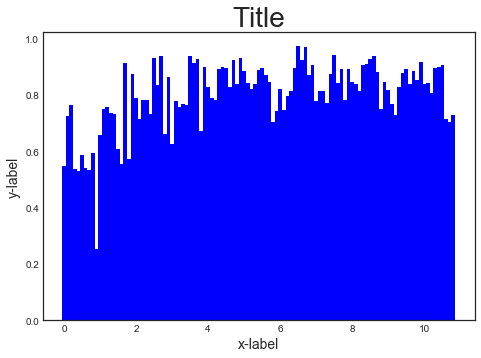

In [42]:
plt.close('all')
NASA = csv_reader('NASA.csv')[0]
#NASA = tp_res(NASA)
title, col_names, row_names, data = NASA
X = np.arange(len(data[0]))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i, row in enumerate(data):
    #for i in range(len(data[0])):
    ax.bar(X + i*(0.1), row, color = 'b', width = 0.1)

quick_plot(ax, fontsize = 14)

In [ ]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.1)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.1)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.1)